<h1>주간 확진자 데이터를 다루는 공간입니다.</h1>

In [ ]:
!pip install pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
data = spark.read.format("csv").option("header", True).load("/content/drive/MyDrive/data/confirmed_cases/주간_누적확진자_신규확진자.csv", encoding='euc-kr')

확인 결과 필요없는 칼럼이 많고 모든 칼럼이 string형식으로 저장되어있음. 결측값과 이상치는 csv파일을 직접열어서 확인했다.

In [ ]:
data.printSchema()

root
 |-- 대륙: string (nullable = true)
 |-- 국가: string (nullable = true)
 |-- 구분: string (nullable = true)
 |-- 주간시작일자: string (nullable = true)
 |-- 일자: string (nullable = true)
 |-- 누적확진(명): string (nullable = true)
 |-- 신규확진(명): string (nullable = true)



In [ ]:
data.show()

+-------------------+--------+-----------+------------+-----------+------------+------------+
|               대륙|    국가|       구분|주간시작일자|       일자|누적확진(명)|신규확진(명)|
+-------------------+--------+-----------+------------+-----------+------------+------------+
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-11-01|11/01-11/07|      381694|       15308|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-10-25|10/25-10/31|      366386|       13297|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-10-18|10/18-10/24|      353089|        9644|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-10-11|10/11-10/17|      343445|       10629|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-10-04|10/04-10/10|      332816|       13039|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-09-27|09/27-10/03|      319777|       16224|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-09-20|09/20-09/26|      303553|       16017|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-09-13|09/13-09/19|      287536|       13121|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-09-06|09/06-09/12|      274415|       12637|
|동아시아/동남아시아|대한민국|주간(월-일)|  2021-08-30|08/30-09/05

'대륙', '국가', '구분' 칼럼 삭제

In [ ]:
data = data.drop('대륙')
data = data.drop('국가')
data = data.drop('구분')
data.show()

+------------+-----------+------------+------------+
|주간시작일자|       일자|누적확진(명)|신규확진(명)|
+------------+-----------+------------+------------+
|  2021-11-01|11/01-11/07|      381694|       15308|
|  2021-10-25|10/25-10/31|      366386|       13297|
|  2021-10-18|10/18-10/24|      353089|        9644|
|  2021-10-11|10/11-10/17|      343445|       10629|
|  2021-10-04|10/04-10/10|      332816|       13039|
|  2021-09-27|09/27-10/03|      319777|       16224|
|  2021-09-20|09/20-09/26|      303553|       16017|
|  2021-09-13|09/13-09/19|      287536|       13121|
|  2021-09-06|09/06-09/12|      274415|       12637|
|  2021-08-30|08/30-09/05|      261778|       11727|
|  2021-08-23|08/23-08/29|      250051|       12269|
|  2021-08-16|08/16-08/22|      237782|       12301|
|  2021-08-09|08/09-08/15|      225481|       13033|
|  2021-08-02|08/02-08/08|      212448|       11446|
|  2021-07-26|07/26-08/01|      201002|       10836|
|  2021-07-19|07/19-07/25|      190166|       10963|
|  2021-07-

In [ ]:
import pyspark.sql.types as T
import pyspark.sql.functions as F

타입을 변경하는김에 겸사겸사 컬럼명도 바꿔줌

In [ ]:
data = data.withColumn('주간시작일자',F.to_date(F.col("주간시작일자"),"yyyy-MM-dd"))\
.withColumn('누적확진자',F.col('누적확진(명)').cast(T.IntegerType()))\
.withColumn('신규확진자',F.col('신규확진(명)').cast(T.IntegerType()))

In [ ]:
data.printSchema()

root
 |-- 주간시작일자: date (nullable = true)
 |-- 일자: string (nullable = true)
 |-- 누적확진(명): string (nullable = true)
 |-- 신규확진(명): string (nullable = true)
 |-- 누적확진자: integer (nullable = true)
 |-- 신규확진자: integer (nullable = true)



integer형태로 바꾸기 전 칼럼인 '누적확진(명)'과 '신규확진(명)'을 제거한다.

In [ ]:
data = data.drop('누적확진(명)')
data = data.drop('신규확진(명)')
data.show()

+------------+-----------+----------+----------+
|주간시작일자|       일자|누적확진자|신규확진자|
+------------+-----------+----------+----------+
|  2021-11-01|11/01-11/07|    381694|     15308|
|  2021-10-25|10/25-10/31|    366386|     13297|
|  2021-10-18|10/18-10/24|    353089|      9644|
|  2021-10-11|10/11-10/17|    343445|     10629|
|  2021-10-04|10/04-10/10|    332816|     13039|
|  2021-09-27|09/27-10/03|    319777|     16224|
|  2021-09-20|09/20-09/26|    303553|     16017|
|  2021-09-13|09/13-09/19|    287536|     13121|
|  2021-09-06|09/06-09/12|    274415|     12637|
|  2021-08-30|08/30-09/05|    261778|     11727|
|  2021-08-23|08/23-08/29|    250051|     12269|
|  2021-08-16|08/16-08/22|    237782|     12301|
|  2021-08-09|08/09-08/15|    225481|     13033|
|  2021-08-02|08/02-08/08|    212448|     11446|
|  2021-07-26|07/26-08/01|    201002|     10836|
|  2021-07-19|07/19-07/25|    190166|     10963|
|  2021-07-12|07/12-07/18|    179203|     10057|
|  2021-07-05|07/05-07/11|    169146| 

저장과 그래프 확인을 위해 pandas dataframe으로 변환

In [ ]:
pdf = data.select("*").toPandas()

In [ ]:
pdf

,주간시작일자,일자,누적확진자,신규확진자
0,2021-11-01,11/01-11/07,381694,15308
1,2021-10-25,10/25-10/31,366386,13297
2,2021-10-18,10/18-10/24,353089,9644
3,2021-10-11,10/11-10/17,343445,10629
4,2021-10-04,10/04-10/10,332816,13039
...,...,...,...,...
89,2020-02-17,02/17-02/23,556,527
90,2020-02-10,02/10-02/16,29,2
91,2020-02-03,02/03-02/09,27,12
92,2020-01-27,01/27-02/02,15,12


지하철 이용자수 데이터는 9월 26일까지 저장했으므로 기간을 벗어난 데이터를 삭제해줌(안그러면 확진자수 그래프가 오른쪽으로 튀어나옴)

In [ ]:
pdf = pdf.drop([0, 1, 2, 3, 4, 5])
pdf = pdf.reset_index()

In [ ]:
pdf

,index,주간시작일자,일자,누적확진자,신규확진자
0,6,2021-09-20,09/20-09/26,303553,16017
1,7,2021-09-13,09/13-09/19,287536,13121
2,8,2021-09-06,09/06-09/12,274415,12637
3,9,2021-08-30,08/30-09/05,261778,11727
4,10,2021-08-23,08/23-08/29,250051,12269
...,...,...,...,...,...
83,89,2020-02-17,02/17-02/23,556,527
84,90,2020-02-10,02/10-02/16,29,2
85,91,2020-02-03,02/03-02/09,27,12
86,92,2020-01-27,01/27-02/02,15,12


In [ ]:
pdf = pdf.drop(['index'], axis=1)
pdf

,주간시작일자,일자,누적확진자,신규확진자
0,2021-09-20,09/20-09/26,303553,16017
1,2021-09-13,09/13-09/19,287536,13121
2,2021-09-06,09/06-09/12,274415,12637
3,2021-08-30,08/30-09/05,261778,11727
4,2021-08-23,08/23-08/29,250051,12269
...,...,...,...,...
83,2020-02-17,02/17-02/23,556,527
84,2020-02-10,02/10-02/16,29,2
85,2020-02-03,02/03-02/09,27,12
86,2020-01-27,01/27-02/02,15,12


parquet파일로 저장 confirmed_cases = 확진자라는 뜻

In [ ]:
pdf.to_parquet('confirmed_cases.parquet')

잘 저장되어있는지 확인

In [ ]:
test = pd.read_parquet('confirmed_cases.parquet')
test

,주간시작일자,일자,누적확진자,신규확진자
0,2021-09-20,09/20-09/26,303553,16017
1,2021-09-13,09/13-09/19,287536,13121
2,2021-09-06,09/06-09/12,274415,12637
3,2021-08-30,08/30-09/05,261778,11727
4,2021-08-23,08/23-08/29,250051,12269
...,...,...,...,...
83,2020-02-17,02/17-02/23,556,527
84,2020-02-10,02/10-02/16,29,2
85,2020-02-03,02/03-02/09,27,12
86,2020-01-27,01/27-02/02,15,12


그래프 그리기

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

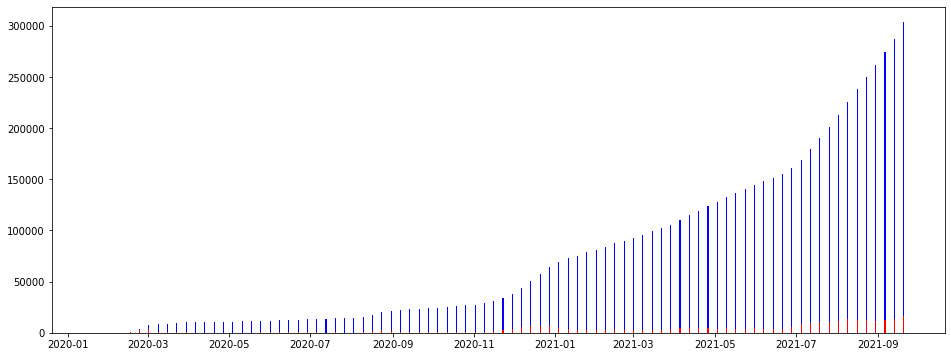

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))


x = np.array(pdf['주간시작일자'].tolist())
data1 = np.array(pdf['누적확진자'].tolist())
data2 = np.array(pdf['신규확진자'].tolist())

plt.bar(x, data2, color='r')
plt.bar(x, data1-data2, color='b', bottom=data2)

plt.show() 